In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datadir_raw = 'F:/Masters/MRP/Datasets_Raw/'
datadir_final = 'F:/Masters/MRP/Datasets/'

In [3]:
mf3 = pd.read_csv(datadir_raw+'Mutual_Funds_Data/mf_3.csv')
mf3

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,UTI-Unit Linked Insurance Plan – Direct,500,15000,0.96,5068.0,10,Amandeep Chopra,2.47,0.92,7.06,0.44,1.29,4,UTI Mutual Fund,0,Hybrid,Dynamic Asset Allocation or Balanced Advantage,-0.7,13.1,6.2
810,UTI-Value Opportunities Fund,500,5000,1.16,6740.0,10,Vetri Subramaniam,3.21,2.73,15.62,0.9,1.48,6,UTI Mutual Fund,4,Equity,Value Funds,1.7,27.2,12.2
811,WhiteOak Capital Liquid Fund,500,500,0.26,197.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Liquid Mutual Funds,5.3,3.8,NaN
812,WhiteOak Capital Overnight Fund,500,500,0.22,14.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Overnight Mutual Funds,1.7,32.4,13.3


In [4]:
mf3.isna().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino            0
alpha              0
sd                 0
beta               0
sharpe             0
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

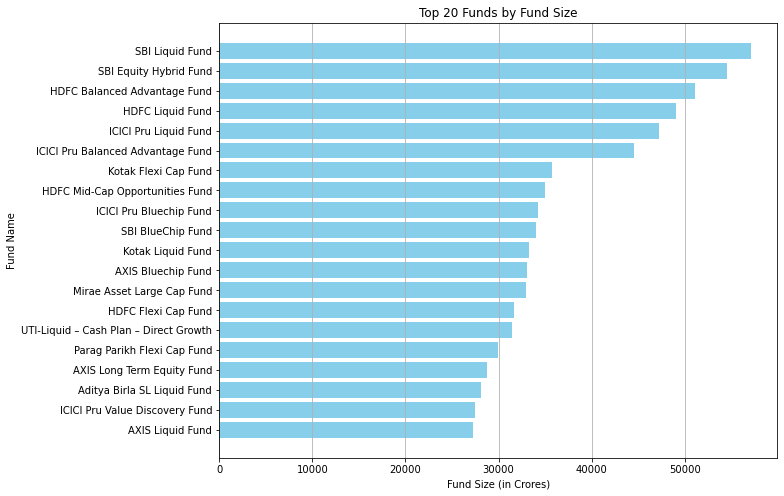

In [33]:
top_20_funds = mf3.nlargest(20, 'fund_size_cr')

fund_names = top_20_funds['scheme_name']
fund_sizes = top_20_funds['fund_size_cr']

plt.figure(figsize=(10, 8))
plt.barh(fund_names, fund_sizes, color='skyblue')
plt.xlabel('Fund Size (in Crores)')
plt.ylabel('Fund Name')
plt.title('Top 20 Funds by Fund Size')
plt.gca().invert_yaxis()  
plt.grid(axis='x')  
plt.show()


<ipython-input-34-3cb6607e6025>:8: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(risk_level_proportions, labels=risk_level_proportions.index, autopct='%1.1f%%', startangle=140)
<ipython-input-34-3cb6607e6025>:16: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(category_proportions, labels=category_proportions.index, autopct='%1.1f%%', startangle=140)


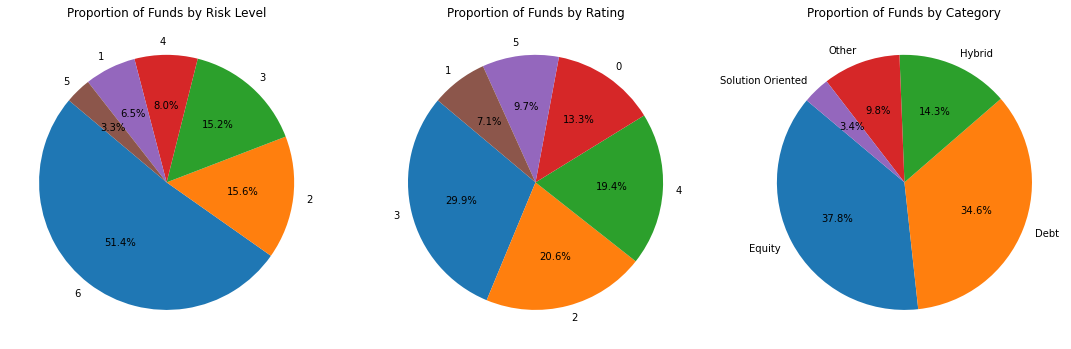

In [34]:
risk_level_proportions = mf3['risk_level'].value_counts(normalize=True)
rating_proportions = mf3['rating'].value_counts(normalize=True)
category_proportions = mf3['category'].value_counts(normalize=True)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.pie(risk_level_proportions, labels=risk_level_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Funds by Risk Level')

plt.subplot(1, 3, 2)
plt.pie(rating_proportions, labels=rating_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Funds by Rating')

plt.subplot(1, 3, 3)
plt.pie(category_proportions, labels=category_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Funds by Category')

plt.tight_layout()
plt.show()


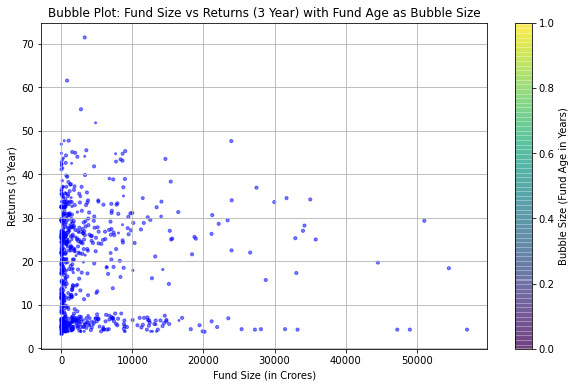

In [36]:
x = mf3['fund_size_cr']
y = mf3['returns_3yr']
bubble_sizes = mf3['fund_age_yr']
bubble_color = 'blue'
plt.figure(figsize=(10, 6))
bubble = plt.scatter(x, y, s=bubble_sizes, c=bubble_color, alpha=0.5)

plt.xlabel('Fund Size (in Crores)')
plt.ylabel('Returns (3 Year)')
plt.title('Bubble Plot: Fund Size vs Returns (3 Year) with Fund Age as Bubble Size')
plt.colorbar(bubble, label='Bubble Size (Fund Age in Years)')
plt.grid(True)
plt.show()

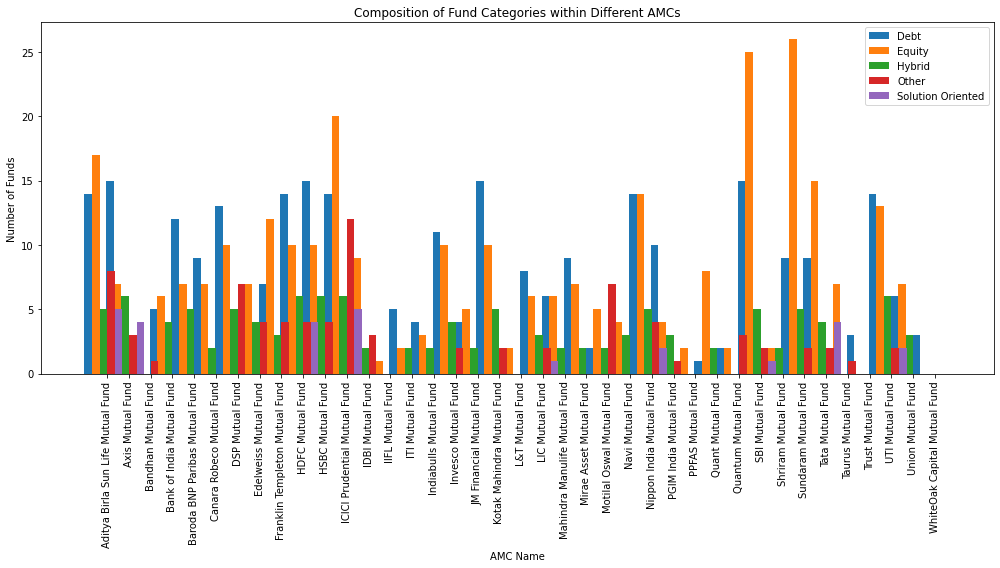

In [24]:
amc_category_counts = mf3.groupby(['amc_name', 'category']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
width = 0.35  
ind = np.arange(len(amc_category_counts))  

for i, category in enumerate(amc_category_counts.columns):
    plt.bar(ind + width*i, amc_category_counts[category], width, label=category)

plt.xlabel('AMC Name')
plt.ylabel('Number of Funds')
plt.title('Composition of Fund Categories within Different AMCs')
plt.xticks(ind + width * len(amc_category_counts.columns) / 2, amc_category_counts.index, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()
